In [77]:
import gensim, logging
import os
from gensim.models.word2vec import PathLineSentences, LineSentence
import pandas as pd
import imp
from tqdm import tqdm_notebook
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

In [2]:
import sys
sys.path.append('/Users/ak/Yandex.Disk.localized/sentiment-neural_past_from_Denis_Kirjanov/src')

In [3]:
from nltk_sent_tokenize_binding import NLTKSentenceTokenizer

–í—ã–≥—Ä—É–∑–∏–º –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã–π word2vec

In [4]:
root_path = '/Users/ak/Yandex.Disk.localized/–ú–∞–≥–∏—Å—Ç—Ä–∞—Ç—É—Ä–∞ –í–®–≠/Chat_word_autofill/'
embedding = gensim.models.Word2Vec
embedding = embedding.load(root_path + 'model_normalized_with_chats_2.bin')

–ó–∞–≥—Ä—É–∑–∏–º –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É (—Å–∞–π—Ç—ã –æ—Ç–∑—ã–≤–æ–≤ + —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ —Ä–∞–∑–º–µ—á–µ–Ω–Ω–æ –∏–∑ —á–∞—Ç–æ–≤)

In [5]:
data1 = pd.read_csv('data_sentences.csv')
data1.head()

/Users/ak/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0  score      source  \
0           0      5  foursquare   
1           1      5  foursquare   
2           2      5  foursquare   
3           3      5  foursquare   
4           4      5  foursquare   

                                                text  
0  2 —Ä–∞–±–æ—á–∏—Ö –º–µ—Å—Ç–∞, –≤—ã–¥–µ–ª–µ–Ω–Ω–æ–µ —Ä–∞–±–æ—á–µ–µ –º–µ—Å—Ç–æ –ø–æ –∫...  
1  pos-—Ç–µ—Ä–º–∏–Ω–∞–ª, —Å–µ–Ω—Å–æ—Ä–Ω—ã–π —ç–∫—Ä–∞–Ω –¥–ª—è —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è "...  
2                                   –æ—á–µ—Ä–µ–¥–∏ –∏–º–µ—é—Ç—Å—è.  
3  free wi-fi "tattelecom_unlim" :) good while wa...  
4                          so pretty interior though

In [6]:
data2 = data1[['text', 'score', 'source']].copy()

In [7]:
samples = pd.read_csv('samples_from_client_mes.csv', 
                      encoding='mac_cyrillic', 
                      delimiter=';', 
                      names=['text', 'score'], 
                     skiprows=1)
samples.score.fillna(value=3, inplace=True)
samples.score.replace(to_replace={'–ø–æ–ª–æ–∂':5, '–æ—Ç—Ä–∏—Ü':1, "–ø":5, "–æ":1}, inplace=True)
samples.text = samples.text.str.replace('& amp, quo,', '')
samples.head()

text  score
0    –û–∫. .. –ü–æ—à–µ–ª –ø–æ—á–∏—Ç–∞—é. .. –° —É—Ç—Ä–æ–º –≤–∞—Å. .. –°–≤–µ—Ç–∏—Ç      3
1  –•–æ—Ä–æ—à–æ, –≤–∫–ª–∞–¥ —Ö–æ—á—É –æ—Ç–∫—Ä—ã—Ç—å –ø–æ–¥ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é —Å—Ç...      3
2         –•–æ—á—É –≤–∫–ª–∞–¥ –æ—Ç–∫—Ä—ã—Ç—å –ø–æ–¥ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é —Å—Ç–∞–≤–∫—É      3
3       –∫–∞–∫ —è –æ—Ç–∫—Ä—ã—Ç—å –º–æ–≥—É –æ—Ç–∫—Ä—ã—Ç—å –±—Ä–æ–∫–µ—Ä—Å–∫–∏–π —Å—á–µ—Ç ?      3
4       –∫–∞–∫ —è –æ—Ç–∫—Ä—ã—Ç—å –º–æ–≥—É –æ—Ç–∫—Ä—ã—Ç—å –±—Ä–æ–∫–µ—Ä—Å–∫–∏–π —Å—á–µ—Ç ?      3

In [8]:
samples.score.value_counts()

3    14964
5      637
1       95
Name: score, dtype: int64

In [9]:
data1.score.value_counts()

1    275811
5    129077
3    106110
2     54943
4     20699
0         3
Name: score, dtype: int64

–†–∞–∑–æ–±—ä–µ–º –∫–ª–∏–µ–Ω—Ç—Å–∫–∏–µ —Å–æ–æ–±—â–µ–Ω–∏—è –∏–∑ —á–∞—Ç–æ–≤ –Ω–∞ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è

In [10]:
sentences = []
scores = []
sources = []
false_stoppings = ["–ª–∞—Ç", "–≥—Ä–µ—á", "–ø—Ä–æ—Ü", "–º–ª–Ω", "–º–ª—Ä–¥", "–∏—Ç–∞–ª", "—Ñ—Ä", "—Ä—É—Å", "–∫–≤", "–º", "—Ç—ã—Å", "—Ä—É–±", "–∞–Ω–≥–ª", "–ø",
                       "—Å—Ç", "–≥–æ—Ä", "–æ–±–ª", "–ø–æ—Å", "–¥", "–¥–µ—Ä", "–¥—Ä", "–ø—Ä", "—Ä–µ–≥", "—É–ª", "–∫", "—Ç.–µ", "—Ç.–ø", "—é—Ä", "—Ñ–∏–∑"]
sentence_tokenizer = NLTKSentenceTokenizer(false_stoppings)
progress_bar = tqdm_notebook(total=samples.shape[0])
for text, score in zip(samples.text.values, samples.score.values):
    for sentence in text.split('\n'):
        s = sentence_tokenizer(sentence)
        sentences.extend(s)
        scores.extend([score for x in s])
        sources.extend(['chat' for x in s])
    progress_bar.update(1)
progress_bar.close()

HBox(children=(IntProgress(value=0, max=15696), HTML(value='')))

In [11]:
samples_sentences = pd.DataFrame({'text':sentences, 'score':scores, 'source':sources})

In [12]:
data = pd.concat([data2, samples])

In [13]:
data.head()

score      source                                               text
0      5  foursquare  2 —Ä–∞–±–æ—á–∏—Ö –º–µ—Å—Ç–∞, –≤—ã–¥–µ–ª–µ–Ω–Ω–æ–µ —Ä–∞–±–æ—á–µ–µ –º–µ—Å—Ç–æ –ø–æ –∫...
1      5  foursquare  pos-—Ç–µ—Ä–º–∏–Ω–∞–ª, —Å–µ–Ω—Å–æ—Ä–Ω—ã–π —ç–∫—Ä–∞–Ω –¥–ª—è —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è "...
2      5  foursquare                                   –æ—á–µ—Ä–µ–¥–∏ –∏–º–µ—é—Ç—Å—è.
3      5  foursquare  free wi-fi "tattelecom_unlim" :) good while wa...
4      5  foursquare                          so pretty interior though

–ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏ –¥–ª—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤

In [14]:
import pickle
with open('model_tokenize.pkl', 'rb') as f:
    normalizer = pickle.load(f)

In [15]:
def norm12345(s):
    tokens = normalizer.lemmatizer.process(s)
    return ' '.join(tokens)

In [39]:
%%time
pool = multiprocessing.Pool(3)
sent_norm = pool.map(norm12345, samples_sentences.text.values)

CPU times: user 30.9 ms, sys: 37.3 ms, total: 68.1 ms
Wall time: 4.34 s


In [32]:
sentences_prev = pd.read_csv('sentences_normalized.txt', header=None)

In [33]:
len(sentences_prev)

557286

In [38]:
len(data1)

586643

In [40]:
len(sent_norm)

18164

In [41]:
len(samples_sentences)

18164

In [42]:
samples_sentences['text_normalized'] = sent_norm

In [43]:
samples_sentences.head(20)

score source                                               text  \
0       3   chat                              –û–∫. .. –ü–æ—à–µ–ª –ø–æ—á–∏—Ç–∞—é.   
1       3   chat                                    .. –° —É—Ç—Ä–æ–º –≤–∞—Å.   
2       3   chat                                          .. –°–≤–µ—Ç–∏—Ç   
3       3   chat  –•–æ—Ä–æ—à–æ, –≤–∫–ª–∞–¥ —Ö–æ—á—É –æ—Ç–∫—Ä—ã—Ç—å –ø–æ–¥ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é —Å—Ç...   
4       3   chat         –•–æ—á—É –≤–∫–ª–∞–¥ –æ—Ç–∫—Ä—ã—Ç—å –ø–æ–¥ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é —Å—Ç–∞–≤–∫—É   
5       3   chat       –∫–∞–∫ —è –æ—Ç–∫—Ä—ã—Ç—å –º–æ–≥—É –æ—Ç–∫—Ä—ã—Ç—å –±—Ä–æ–∫–µ—Ä—Å–∫–∏–π —Å—á–µ—Ç ?   
6       3   chat       –∫–∞–∫ —è –æ—Ç–∫—Ä—ã—Ç—å –º–æ–≥—É –æ—Ç–∫—Ä—ã—Ç—å –±—Ä–æ–∫–µ—Ä—Å–∫–∏–π —Å—á–µ—Ç ?   
7       3   chat       –∫–∞–∫ —è –æ—Ç–∫—Ä—ã—Ç—å –º–æ–≥—É –æ—Ç–∫—Ä—ã—Ç—å –±—Ä–æ–∫–µ—Ä—Å–∫–∏–π —Å—á–µ—Ç ?   
8       3   chat      —Ö–æ—á—É –∫–∞—Ä—Ç—É –æ—Ç–∫—Ä—ã—Ç—å, —á—Ç–æ –º–æ–∂–µ—Ç–µ –ø–æ—Å–æ–≤–µ—Ç–æ–≤–∞—Ç—å ?   
9       3   chat      —Ö–æ—á—É –∫–∞—Ä—Ç—É –æ—Ç–∫—Ä—ã—Ç—å, —á—Ç–æ –º–æ–∂–µ—Ç–µ –ø–æ—Å–æ–≤–µ—Ç–æ–≤–∞—Ç—å ?   
10      3   chat          –ê –∞–¥—Ä–µ—Å –æ—Ñ–∏—Å–∞ –≤ –≥ –í–æ—Ä–æ–Ω–µ–∂ –Ω–µ –ø–æ–¥—Å–∫–∞–∂–µ—Ç–µ ?   
11      3   chat       –í–∞–º –Ω–∞–≤–µ—Ä–Ω–æ –Ω–µ–ª—å–∑—è –Ω–∞ —Ç–∞–∫–∏–µ –≤–æ–ø—Ä–æ—Å—ã –æ—Ç–≤–µ—á–∞—Ç—å   
12      3   chat     –ù—É, –ø–ª–∞—Ç—å—è, —Ç—É—Ñ–µ–ª—å–∫–∏ –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ –ø–æ–∫—É–ø–∞—Ç—å —Ö–æ—á—É   
13      3   chat      # Name, –∫–∞–∫ —è –º–æ–≥—É –æ—Ç–∫—Ä—ã—Ç—å –±—Ä–æ–∫–µ—Ä—Å–∫–∏–π —Å—á–µ—Ç ?,   
14      3   chat         –î–∞ –≤–æ—Ç –∫—Ä–µ–¥–∏—Ç–∫—É –≤–∑—è–ª —Å–µ–±–µ, –æ–Ω–∞ —Å–µ—Ä–µ–Ω—å–∫–∞—è .   
15      3   chat    # Name, —É –≤–∞—Å –º–æ–∂–Ω–æ –æ—Ñ–æ—Ä–º–∏—Ç—å –≤–∫–ª–∞–¥ –≤ –¥–æ–ª–ª–∞—Ä–∞—Ö ?   
16      3   chat                 –¢–æ –µ—Å—Ç—å –ø—Ä–µ–º—å–µ—Ä —ç—Ç–æ –ø–æ–ª–Ω–∞—è –µ—Ä—É–Ω–¥–∞.   
17      3   chat                                              .. ..   
18      3   chat         –¢–æ –µ—Å—Ç—å –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–∏ –∫–∞–∫–∏—Ö ?   
19      3   chat   –£ –º–µ–Ω—è –±–∞–±—É—à–∫–∞ —Ö–æ—á–µ—Ç –æ—Ç–∫—Ä—ã—Ç—å –≤–∫–ª–∞–¥ –≤ –≤–∞—à–µ–º –±–∞–Ω–∫–µ   

                                      text_normalized  
0                                  –æ–∫–∞ –ø–æ–π—Ç–∏ –ø–æ—á–∏—Ç–∞—Ç—å  
1                                                —É—Ç—Ä–æ  
2                                             —Å–≤–µ—Ç–∏—Ç—å  
3   —Ö–æ—Ä–æ—à–æ –≤–∫–ª–∞–¥ —Ö–æ—Ç–µ—Ç—å –æ—Ç–∫—Ä—ã–≤–∞—Ç—å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π —Å—Ç–∞–≤–∫–∞  
4          —Ö–æ—Ç–µ—Ç—å –≤–∫–ª–∞–¥ –æ—Ç–∫—Ä—ã–≤–∞—Ç—å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π —Å—Ç–∞–≤–∫–∞  
5            –æ—Ç–∫—Ä—ã–≤–∞—Ç—å –º–æ—á—å –æ—Ç–∫—Ä—ã–≤–∞—Ç—å –±—Ä–æ–∫–µ—Ä—Å–∫–∏–π —Å—á–µ—Ç  
6            –æ—Ç–∫—Ä—ã–≤–∞—Ç—å –º–æ—á—å –æ—Ç–∫—Ä—ã–≤–∞—Ç—å –±—Ä–æ–∫–µ—Ä—Å–∫–∏–π —Å—á–µ—Ç  
7            –æ—Ç–∫—Ä—ã–≤–∞—Ç—å –º–æ—á—å –æ—Ç–∫—Ä—ã–≤–∞—Ç—å –±—Ä–æ–∫–µ—Ä—Å–∫–∏–π —Å—á–µ—Ç  
8            —Ö–æ—Ç–µ—Ç—å –∫–∞—Ä—Ç–∞ –æ—Ç–∫—Ä—ã–≤–∞—Ç—å –º–æ—á—å –ø–æ—Å–æ–≤–µ—Ç–æ–≤–∞—Ç—å  
9            —Ö–æ—Ç–µ—Ç—å –∫–∞—Ä—Ç–∞ –æ—Ç–∫—Ä—ã–≤–∞—Ç—å –º–æ—á—å –ø–æ—Å–æ–≤–µ—Ç–æ–≤–∞—Ç—å  
10                 –∞–¥—Ä–µ—Å –æ—Ñ–∏—Å –≤–æ—Ä–æ–Ω–µ–∂ –Ω–µ –ø–æ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å  
11               –Ω–∞–≤–µ—Ä–Ω–æ –Ω–µ–ª—å–∑—è —Ç–∞–∫–æ–π –≤–æ–ø—Ä–æ—Å –æ—Ç–≤–µ—á–∞—Ç—å  
12           –ø–ª–∞—Ç—å–µ —Ç—É—Ñ–µ–ª—å–∫–∞ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –ø–æ–∫—É–ø–∞—Ç—å —Ö–æ—Ç–µ—Ç—å  
13                name –º–æ—á—å –æ—Ç–∫—Ä—ã–≤–∞—Ç—å –±—Ä–æ–∫–µ—Ä—Å–∫–∏–π —Å—á–µ—Ç  
14                   –¥–∞ –∫—Ä–µ–¥–∏—Ç–∫–∞ –≤–∑—è—Ç—å —Å–µ–±—è —Å–µ—Ä–µ–Ω—å–∫–∏–π  
15                  name –º–æ–∂–Ω–æ –æ—Ñ–æ—Ä–º–ª—è—Ç—å –≤–∫–ª–∞–¥ –¥–æ–ª–ª–∞—Ä  
16                         –±—ã—Ç—å –ø—Ä–µ–º—å–µ—Ä –ø–æ–ª–Ω—ã–π –µ—Ä—É–Ω–¥–∞  
17                                                     
18                   –±—ã—Ç—å –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–æ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–∏  
19                –±–∞–±—É—à–∫–∞ —Ö–æ—Ç–µ—Ç—å –æ—Ç–∫—Ä—ã–≤–∞—Ç—å –≤–∫–ª–∞–¥ –±–∞–Ω–∫

In [47]:
samples_sentences[samples_sentences.score == 1]

score source                                               text  \
28         1   chat                                           –û—Ç–ª–∏—á–Ω–æ.   
29         1   chat                                     –ü–æ—Ç–µ—Ä—è–ª –∫–∞—Ä—Ç—É.   
30         1   chat                              –ê –ø–∏–Ω-–∫–æ–¥ –∏–∑–º–µ–Ω–∏—Ç—Å—è ?   
521        1   chat        –ö–∞–∫ –ø–ª–æ—Ö–æ, –∞ –æ–Ω–∏ —Ç–æ–≥–¥–∞ –∫–∞–∫ –±—ã—Å—Ç—Ä–æ —Å–≥–æ—Ä–∞—é—Ç ?   
1022       1   chat       –Ω–µ –æ–¥–∏–Ω –∏–∑ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–Ω—ã—Ö –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ –Ω–µ –ø–æ–¥–æ—à—ë–ª   
1036       1   chat  –ù–µ –º–æ–≥—É —Å–æ–≤–µ—Ä—à–∏—Ç—å –ø–æ–∫—É–ø–∫–∏ –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ —á–µ—Ä–µ–∑ –∫–∞—Ä—Ç—É   
1243       1   chat      –ê –ø–æ—Ç–æ–º –≤—ã –±–µ—Ä–µ—Ç–µ –∏ –æ—Ç–∫–∞–∑—ã–≤–∞–µ—Ç–µ, –≥–¥–µ –ª–æ–≥–∏–∫–∞ ?   
2720       1   chat                    –£ –º–µ–Ω—è –±–∞–Ω–∫–æ–º–∞—Ç –∫–∞—Ä—Ç—É –∑–∞—Ö–≤–∞—Ç–∏–ª.   
2721       1   chat                                     –ß—Ç–æ –º–Ω–µ –¥–µ–ª–∞—Ç—å   
3026       1   chat                                              –ñ–∞–ª—å.   
3027       1   chat                .. –∞ –µ–≥–æ –º–æ–∂–Ω–æ –∫–∞–∫-—Ç–æ –ø–æ–ª—É—á–∏—Ç—å ? ))   
3383       1   chat   –û—Ç–∫–∞–∑–∞–ª –º–Ω–µ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–∏—Ç—å –ª–∏—á–Ω—ã–π –Ω–æ–º–µ—Ä –∏ –Ω–µ—Å —á—É—à—å   
3767       1   chat                 –°–ø–∞—Å–∏–±–æ, –∑–∞ –∑—Ä—è –ø–æ—Ç—Ä–∞—á–µ–Ω–Ω–æ–µ –≤—Ä–µ–º—è.   
3768       1   chat                                         –î–æ—Å–≤–∏–¥–∞–Ω—å–µ   
3949       1   chat  –Ø # Name –∑–∞—è–≤–∫—É –¥–ª—è –≤–∞—à–µ–≥–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è –∏ –Ω–µ—Ç –æ—Ç...   
3950       1   chat        –¥–æ —Å–∏—Ö –ø–æ—Ä –º–Ω–µ –Ω–µ –ø–æ–∑–≤–æ–Ω–∏–ª–∏ –∏ –Ω–µ –¥–∞–ª–∏ –æ—Ç–≤–µ—Ç   
3951       1   chat          –∑–∞—á–µ–º –≤–≤–æ–¥–∏—Ç—å —á–µ–ª–æ–≤–µ–∫–∞ –≤ –∑–∞–±–ª—É–∂–¥–µ–Ω–∏–µ ????   
3973       1   chat  –Ω–µ —Ç–∞–∫ –Ω–µ –ø–æ–π–¥—ë—Ç —á–∞—Ç - –æ—Ç—Å—Ç–æ–π —è –ª—É—á—à–µ –ø–µ—Ä–µ–∑–≤–æ–Ω—é .   
4038       1   chat        –í—ã–¥–∞—ë—Ç –æ—à–∏–±–∫—É –∏ –≥–æ–≤–æ—Ä–∏—Ç, —á—Ç–æ –Ω–µ—Ç –ø–æ–ª–Ω–æ–º–æ—á–∏–π   
4151       1   chat          –í–º–µ—Å—Ç–æ –Ω–µ—á–µ–≥–æ –≤–Ω—è—Ç–Ω–æ–≥–æ —è –Ω–µ —á–µ–≥–æ –ø–æ–Ω—è–ª !!   
4215       1   chat       –Ω–∞ —Å–∞–π—Ç–µ –Ω–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ñ–æ—Ä–º–∏—Ç—å –Ω—É–∂–Ω—É—é —Å—É–º–º—É   
4534       1   chat        –Ø –≤—ã—Ä–∞–∂–∞—é—Å—å –æ—á–µ–Ω—å –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ —É–≤–∞–∂–∞–µ–º–∞—è !!!!!   
4535       1   chat                                                 !.   
5634       1   chat   –ú–î–ê, –Ω–æ–≤–æ–≤–≤–µ–¥–µ–Ω–∏–µ –≤–≤–µ–ª–∏, –∞ –°–±–µ—Ä–±–∞–Ω–∫ –≤—Å–µ —Ç–æ—Ç –∂–µ .   
6453       1   chat          —Å–ø–∞—Å–∏–±–æ –∑–∞ –æ—Ç–≤–µ—Ç, –±—É–¥—É –∏—Å–∫–∞—Ç—å –¥—Ä—É–≥–æ–π –±–∞–Ω–∫   
6681       1   chat         –ë–ª–∏–Ω, —Ç–æ –µ—Å—Ç—å –ø—Ä–æ–ª–æ–Ω–≥–∞—Ü–∏—è –Ω–µ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—Å—è ?(   
7016       1   chat                      –•–æ—Ç–µ–ª —Å–∫–∞–∑–∞—Ç—å —á—Ç–æ —Å–∞–π—Ç –≥–∞–≤–Ω–æ.   
7017       1   chat                                 –∫–Ω–æ–ø–∫—É —Ö—É–π –Ω–∞–π–¥–µ—à—å   
7333       1   chat        –¢–∞–∫ –ø–æ–ª—É—á–∏–ª–æ—Å—å —á—Ç–æ –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –∏—Å—Ç–æ—Ä–∏—è –ø–ª–æ—Ö–∞—è   
7369       1   chat      –¢–∞–∫ —è –∏ –ø–æ–¥–∞–≤–∞–ª –Ω–∞ –º–µ–Ω—å—à–µ —Å—É–º–º—É –∏ —Ç–æ –æ—Ç–∫–∞–∑–∞–ª–∏   
...      ...    ...                                                ...   
14375      1   chat                           —è –±—É–¥—É –∂–∞–ª–æ–≤–∞—Ç—å—Å—è –Ω–∞ –≤–∞—Å   
14530      1   chat                             # Name –ª—É—á—à–µ –æ–±—ä—è—Å–Ω—è–ª–∞   
14750      1   chat                            –ó—Ä—è —è —Å—é–¥–∞ –ø–∏—Å–∞–ª –ø–æ—Ö–æ–¥—É   
14762      1   chat                           –ë–ª–∏–Ω, –æ–Ω–∞ –º–Ω–µ –Ω–µ –Ω—É–∂–Ω–∞ .   
14970      1   chat                            –Ø –Ω–µ –ø–æ–Ω–∏–º–∞—é —Ç–∞–º –Ω–∏—á–µ–≥–æ   
15104      1   chat                            –¢–∞–º –Ω–µ –º–æ–≥—É —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è   
15174      1   chat                                              –Ø—Å–Ω–æ.   
15175      1   chat                                   –í—ã –Ω–µ –ø–æ–º–æ–∂–µ—Ç–µ (   
15334      1   chat                              –ü–æ-—Ä—É—Å—Å–∫–∏ –æ–±—ä—è—Å–Ω–∏ –∫–∞–∫   
15394      1

–ü–æ—Å—Ç—Ä–æ–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–π. –≠—Ç–æ –ø–æ–ª–µ–∑–Ω–æ –ø—Ä–æ–¥–µ–ª–∞—Ç—å –¥–ª—è –ø–æ–Ω–∏–º–∞–Ω–∏—è —Ç–æ–≥–æ, —Å—Ç–æ–∏—Ç –ª–∏ –ø—Ä–∏–º–µ–Ω—è—Ç—å –ª–∏–Ω–µ–π–Ω—ã–µ –º–µ—Ç–æ–¥—ã

In [16]:
vect_reshape = embedding.wv.vectors.reshape(-1, 1)

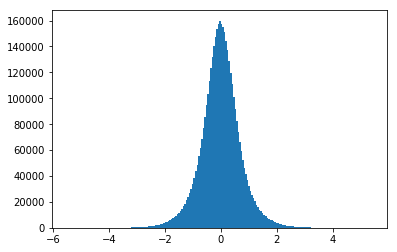

In [56]:
_ = plt.hist(vect_reshape, bins=200)

In [58]:
vect_reshape.mean(), vect_reshape.std(), vect_reshape.var()

(-0.0049994807, 0.7040981, 0.49575418)

In [66]:
%%time
pool = multiprocessing.Pool(3)
sent_norm_data1 = pool.map(norm12345, data1.text.values)

CPU times: user 1.06 s, sys: 588 ms, total: 1.65 s
Wall time: 2min 12s


In [67]:
data1['text_normalized'] = sent_norm_data1

In [68]:
data1.head(60)

Unnamed: 0  score      source  \
0            0      5  foursquare   
1            1      5  foursquare   
2            2      5  foursquare   
3            3      5  foursquare   
4            4      5  foursquare   
5            5      3  foursquare   
6            6      3  foursquare   
7            7      2  foursquare   
8            8      2  foursquare   
9            9      2  foursquare   
10          10      2  foursquare   
11          11      5  foursquare   
12          12      3  foursquare   
13          13      3  foursquare   
14          14      3  foursquare   
15          15      3  foursquare   
16          16      5  foursquare   
17          17      1  foursquare   
18          18      1  foursquare   
19          19      3  foursquare   
20          20      3  foursquare   
21          21      3  foursquare   
22          22      1  foursquare   
23          23      3  foursquare   
24          24      3  foursquare   
25          25      5  foursquare   
26          26      5  foursquare   
27          27      5  foursquare   
28          28      5  foursquare   
29          29      1  foursquare   
30          30      1  foursquare   
31          31      1  foursquare   
32          32      1  foursquare   
33          33      1  foursquare   
34          34      1  foursquare   
35          35      1  foursquare   
36          36      1  foursquare   
37          37      1  foursquare   
38          38      1  foursquare   
39          39      1  foursquare   
40          40      1  foursquare   
41          41      1  foursquare   
42          42      5  foursquare   
43          43      5  foursquare   
44          44      1  foursquare   
45          45      2  foursquare   
46          46      2  foursquare   
47          47      1  foursquare   
48          48      1  foursquare   
49          49      1  foursquare   
50          50      1  foursquare   
51          51      1  foursquare   
52          52      1  foursquare   
53          53      1  foursquare   
54          54      1  foursquare   
55          55      5  foursquare   
56          56      3  foursquare   
57          57      3  foursquare   
58          58      5  foursquare   
59          59      5  foursquare   

                                                 text  \
0   2 —Ä–∞–±–æ—á–∏—Ö –º–µ—Å—Ç–∞, –≤—ã–¥–µ–ª–µ–Ω–Ω–æ–µ —Ä–∞–±–æ—á–µ–µ –º–µ—Å—Ç–æ –ø–æ –∫...   
1   pos-—Ç–µ—Ä–º–∏–Ω–∞–ª, —Å–µ–Ω—Å–æ—Ä–Ω—ã–π —ç–∫—Ä–∞–Ω –¥–ª—è —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è "...   
2                                    –æ—á–µ—Ä–µ–¥–∏ –∏–º–µ—é—Ç—Å—è.   
3   free wi-fi "tattelecom_unlim" :) good while wa...   
4                           so pretty interior though   
5                   –∞–ø–ø–∞—Ä–∞—Ç –ø–æ –≤—ã–¥–∞—á–∏ —Ç–∞–ª–æ–Ω–æ–≤ —Å–ª–æ–º–∞–Ω!   
6   –≤—Å–ø–æ–º–∏–Ω–∞–µ–º —Å—Ç–∞—Ä—É—é, "–¥–æ–±—Ä—É—é" –æ—á–µ—Ä–µ–¥—å, –∫–∞–∫ –≤ –ø–æ–ª...   
7   –≤ —Å–±–µ—Ä–±–∞–Ω–∫–µ —É—Å—Ç–∞–Ω–æ–≤–∏–ª–∏ –Ω–æ–≤—É—é –ø—Ä–æ–≥—Ä–∞–º–º—É-—Ç–µ–ø–µ—Ä—å ...   
8                                              –∫–ª–∞—Å—Å.   
9            –≤ —Å–±–µ—Ä–µ, –∫–∞–∫ –æ–±—ã—á–Ω–æ, "–ø—Ä–∏—è—Ç–Ω—ã–µ –Ω–æ—É-—Ö–∞—É"‚Ä¶   
10                                                  )   
11  –≤ —ç–ª–µ–∫—Ç—Ä–æ–Ω–Ω–æ–π –æ—á–µ—Ä–µ–¥–∏ —Ä–µ–∞–ª—å–Ω–æ –¥–æ–∂–¥–∞—Ç—å—Å—è –æ–±—Å–ª—É–∂...   
12  –≤–ª–∞–¥–µ–ª—å—Ü—ã –≤–∏–∑–∞ –∏ –º–∞—Å—Ç–µ—Ä–∫–∞—Ä–¥ –≥–æ–ª–¥, –¥–æ–±—Ä–æ –ø–æ–∂–∞–ª–æ...   
13                   —Ç—É—Ç –±–µ—Å–ø–ª–∞—Ç–Ω—ã–π –≤–∞–π—Ñ–∞–π –¥–∞–∂–µ –µ—Å—Ç—å.   
14       –≥–æ–≤–æ—Ä–∏—à—å –∏–º "–¥–æ–±—Ä—ã–π –¥–µ–Ω—å", –∞ –≤ –æ—Ç–≤–µ—Ç —Ç–∏—à–∏–Ω–∞!   
15        –ø–æ—Ä–∞ —É—á–∏—Ç—å —Å–≤–æ–∏—Ö —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –∑–¥–æ—Ä–æ–≤–∞—Ç—å—Å—è!:)   
16  –µ—Å–ª–∏ —Ö–æ—Ç–∏—Ç–µ –ø–æ—Å–ª—É—à–∞—Ç—å "–ª—É—á —Å–æ–ª–Ω—Ü–∞ –∑–æ–ª–æ—Ç–æ–≥–æ" –∏ ...   
17  –∑–∞–¥–∞–≤–∞—Ç—å –≤–æ–ø—Ä–æ—Å—ã –ø–æ "–ø–ª–∞—Å—Ç–∏–∫—É" –ª—É—á—à–µ –∑–¥–µ—Å—å –Ω–µ ...   
18  –∫–∞–∫–∏–µ-—Ç–æ –Ω–µ–ª–µ–ø—ã–µ –∏–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏ –Ω–∞ —É—Ä–æ–≤–Ω–µ –ø—Ä–µ–¥–ø–æ–ª–æ...   
19          –∑–¥–µ—Å—å –Ω–µ—Ç —Ç–∞–ª–æ–Ω—á–∏–∫–æ–≤ —ç–ª–µ–∫—Ç—Ä–æ–Ω–Ω–æ–π –æ—á–µ—Ä–µ–¥–∏. 

In [69]:
data2 = data1[['text', 'text_normalized', 'score', 'source']].copy()

In [70]:
data = pd.concat([data2, samples_sentences])

In [71]:
data.head()

score      source                                               text  \
0      5  foursquare  2 —Ä–∞–±–æ—á–∏—Ö –º–µ—Å—Ç–∞, –≤—ã–¥–µ–ª–µ–Ω–Ω–æ–µ —Ä–∞–±–æ—á–µ–µ –º–µ—Å—Ç–æ –ø–æ –∫...   
1      5  foursquare  pos-—Ç–µ—Ä–º–∏–Ω–∞–ª, —Å–µ–Ω—Å–æ—Ä–Ω—ã–π —ç–∫—Ä–∞–Ω –¥–ª—è —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è "...   
2      5  foursquare                                   –æ—á–µ—Ä–µ–¥–∏ –∏–º–µ—é—Ç—Å—è.   
3      5  foursquare  free wi-fi "tattelecom_unlim" :) good while wa...   
4      5  foursquare                          so pretty interior though   

                                     text_normalized  
0  —Ä–∞–±–æ—á–∏–π –º–µ—Å—Ç–æ –≤—ã–¥–µ–ª—è—Ç—å —Ä–∞–±–æ—á–∏–π –º–µ—Å—Ç–æ –∫—Ä–µ–¥–∏—Ç –∫–∞—Å—Å–∞  
1  pos —Ç–µ—Ä–º–∏–Ω–∞–ª —Å–µ–Ω—Å–æ—Ä–Ω—ã–π —ç–∫—Ä–∞–Ω –¥–ª—è —É–ø—Ä–∞–≤–ª–µ–Ω–∏–µ —Å–±...  
2                                    –æ—á–µ—Ä–µ–¥—å –∏–º–µ—Ç—å—Å—è  
3           free wi fi tattelecom good while waiting  
4                          so pretty interior though

In [ ]:
data = 

In [78]:
data['len'] = data.text_normalized.apply(lambda x: len(str(x).split()))

In [79]:
data['len'].value_counts()

1      54450
3      52998
4      52426
2      50196
5      48027
6      44485
7      39930
8      34760
9      29654
0      29417
10     25692
11     21700
12     18588
13     15985
14     13408
15     11261
16      9882
17      7949
18      6768
19      5468
20      4861
21      3910
22      3293
23      2736
24      2289
25      1997
26      1663
27      1466
28      1206
29      1115
       ...  
132        1
176        1
136        1
141        1
159        1
142        1
150        1
591        1
115        1
112        1
571        1
574        1
568        1
575        1
563        1
576        1
599        1
319        1
601        1
582        1
583        1
608        1
97         1
610        1
100        1
588        1
615        1
107        1
619        1
330        1
Name: len, Length: 156, dtype: int64

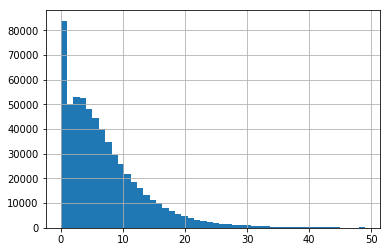

In [80]:
data[data['len'] < 50]['len'].hist(bins=48)

In [81]:
data[data['len'] == 0]

score      source                                               text  \
10          2  foursquare                                                  )   
52          1  foursquare                                                :(.   
65          5  foursquare                                                  ‚Ä¶   
66          5  foursquare                                                ‚Ä¶ ‚Ä¶   
84          5  foursquare                                                23.   
177         3  foursquare                                                 :/   
198         5  foursquare                                                :))   
220         1  foursquare                                              !!!!!   
307         5  foursquare                                                ; )   
317         5  foursquare                                               30).   
319         5  foursquare                                                  .   
323         5  foursquare                                                 :)   
397         5  foursquare                                                ; )   
431         5  foursquare                                                ^_^   
526         1  foursquare                                                  .   
583         3  foursquare                                          00 –¥–æ 20.   
585         3  foursquare                                          00 –¥–æ 15.   
642         5  foursquare                                        89037207299   
644         5  foursquare                                                  !   
763         5  foursquare                                                )))   
1152        3  foursquare                                                  (   
1166        5  foursquare                                                .))   
1175        5  foursquare                                                ‚Ä¶ ‚Ä¶   
1176        5  foursquare                                                  .   
1183        5  foursquare                                                  !   
1190        1  foursquare                                               ((((   
1224        5  foursquare                                                  !   
1257        5  foursquare                                                  !   
1321        3  foursquare                                         –≥–¥–µ —Ç–æ —Ç—É—Ç   
1331        5  foursquare                                                :-)   
...       ...         ...                                                ...   
585741      1           0  https://tvrain.ru/news/miting_protiv_terrorizm...   
585828      1           0                                             –ó–∞—á–µ–º?   
585859      1           0                                                ‚Ä¶ ‚Ä¶   
585860      1           0                                                ..Ôªø   
585900      1           0                                                  .   
585915      1           0                                               –ü.—Å.   
585920      5           0                                                üì∑üòäüòâ   
585922      5           0                                                !üí∏üëå   
585949      1           0                                                  ‚Ä¶   
585954      1           0                                                  ?   
585955      1           0                                    üîûüîûüîûüîûüîû‚ö†‚ö†‚ö†‚ö†‚ö†‚ö†‚ö†‚ö†‚ö†‚ö†   
585966      1           0                                                  .   
585968      1           0                                                  !   
586047      3           0                                               0.00   
586065      1           0                                                  ‚Ä¶   
586128      1           0                                          16.03.17–≥   
586146      1           0                                    –ø–æ 01.06.2017–≥

In [82]:
len(data)

604807

In [83]:
data.to_csv('all_data_normalized.csv')